__INICIO e IMPORTACION DE train_set y test_set__
__dataset en : https://www.kaggle.com__

In [ ]:
!pip install --upgrade pip
!pip install pandas numpy matplotlib scikit-learn


In [ ]:
%pip install tensorflow

In [7]:
# Step 0. Load libraries and custom modules
# System --------------------------------------------------------
import os
import pathlib
# Dataframes and matrices ---------------------------------------
import numpy as np
import pandas as pd
# Graphics ------------------------------------------------------
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Machine learning ----------------------------------------------
from sklearn.model_selection import train_test_split
# Deep learning -------------------------------------------------
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten
from tensorflow.keras.layers import Activation, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import get_file
from keras.utils import image_dataset_from_directory

2022-08-21 03:13:48.505190: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-21 03:13:48.505228: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [8]:
import matplotlib.image as mpimg

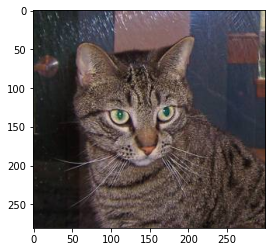

In [9]:
# Sample a cat image/workspace/REDES-NEURONALES-EN-CLASE/data/Cat
sample_cat = mpimg.imread('./cute_cat.jpg')
plt.imshow(sample_cat)
plt.show()

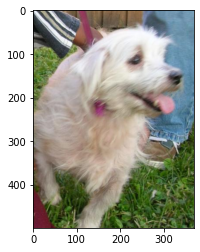

In [11]:
# Sample a dog image
sample_dog = mpimg.imread('./cute_dog.jpg')
plt.imshow(sample_dog)
plt.show()

In [ ]:
from keras.preprocessing import image
imagen = image.load_img("./cute_dog.jpg")
plt.imshow(imagen)


In [ ]:
pets_train = next(os.walk("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/training_set/cats/"))[2]
len(pets_train)

In [ ]:
gatos_train = next(os.walk("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/test_set/cats/"))[2]
len(gatos_train)

__INICIO DE ARQUITECTURA CONVUNCIONAL__

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Inicializar keras
model = Sequential()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/training_set/",        #Directorio con imagenes 
                                                 target_size = (64, 64),                #Tamaño para cargar las imagenes
                                                 batch_size = 32,         # Reajusta los pesos cada 32 imagenes 
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/test_set/",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

In [ ]:
train_set.class_indices 

In [ ]:
 train_set[0][0][0]

In [ ]:
train_set[0][0][0].shape

In [ ]:
# Capa de convolución
model.add(Conv2D(filters = 32, 
                 kernel_size = (3, 3), 
                 input_shape = (64, 64, 3), 
                 activation = 'relu'))

In [ ]:
# Capa de Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))      #max-pooling con submatrices 2x2

__MODELO DE CLASIFICACION__

In [ ]:
# Código completo:

# Librerias de Keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

#------------------------------------------------------------------------------------------------------------------------
#Extraer pixels

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/training_set/",        #Directorio con imagenes 
                                                 target_size = (64, 64),                #Tamaño para cargar las imagenes
                                                 batch_size = 32,         # Reajusta los pesos cada 32 imagenes 
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory("D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/test_set/",
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


#------------------------------------------------------------------------------------------------------------------------
# Inicializar keras
model = Sequential()

# Capa de convolución
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Capa de Max-Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))      #max-pooling con submatrices 2x2

# Segunda capa de convolución 
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

#Max-Pooling segunda capa 
model.add(MaxPooling2D(pool_size = (2, 2)))

#Flattering
model.add(Flatten())


#------------------------------------------------------------------------------------------------------------------------
#Red neuronal de toda la vida  
model.add(Dense(units = 128, activation = 'relu'))         #Capa oculta 
model.add(Dense(units = 1, activation = 'sigmoid'))        #Capa de salida 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])    #compilación 

#------------------------------------------------------------------------------------------------------------------------

#Entrenar el modelo: 
model.fit_generator(train_set,
                         steps_per_epoch = 8000,       #Nº imagenes 
                         epochs = 1,
                         validation_data = test_set,
                         validation_steps = 2000)

In [ ]:
#Guardar modelo 
model.save("gato_perro.h5")

In [ ]:
# Cargar modelo
from keras.models import load_model
gato_perro = load_model("gato_perro.h5")

__PRUEBA CON GATO__ (nos debe salir resultado 0)

In [ ]:
from keras.preprocessing import image

imagen = image.load_img('D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/test_set/cats/cat.4867.jpg')

plt.imshow(imagen);

In [ ]:
from keras.preprocessing import image

#Cargar imagen con formato 64x64
imagen = image.load_img('D:/MiniProyectos_Python/Gatos_Perros-RNC-Clasificador/dataset/test_set/cats/cat.4867.jpg', target_size = (64, 64)) 

#Obtener pixels 
imagen = image.img_to_array(imagen)
imagen = np.expand_dims(imagen, axis = 0)

In [ ]:
#Pasar imagen al modelo
resultado = gato_perro.predict(imagen)

resultado
#Pasar imagen al modelo
resultado = gato_perro.predict(imagen)

if(resultado==[1.]):
    print('PERRO')
else:
    if(resultado==[0.]):
        print('GATO')

__PRUEBA CON PERRO (nos debe salir resultado 1)__

In [ ]:
from keras.preprocessing import image

imagen = image.load_img('D:/MiniProyectos_Python/toffiAdulto.jpg')

plt.imshow(imagen);

In [ ]:
from keras.preprocessing import image

#Cargar imagen con formato 64x64
imagen = image.load_img('D:/MiniProyectos_Python/toffiAdulto.jpg', target_size = (64, 64)) 

#Obtener pixels 
imagen = image.img_to_array(imagen)
imagen = np.expand_dims(imagen, axis = 0)

In [ ]:
#Pasar imagen al modelo
resultado = gato_perro.predict(imagen)
resultado
if(resultado==[1.]):
    print('PERRO')
else:
    if(resultado==[0.]):
        print('GATO')